In [1]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
data_2021 = pd.read_csv('../DATASET/2021/Hasil_2021.csv')
data_2022 = pd.read_csv('../DATASET/2022/Hasil_2022.csv')
data_2023 = pd.read_csv('../DATASET/2023/Hasil_2023.csv')
data_JP = pd.read_csv('../DATASET/Jumlah penduduk/Jumlah Penduduk .csv')
data_KP = pd.read_csv('../DATASET/Kapasitas Pembangkit/Kapasitas Pembangkit Listrik.csv')
data_final = pd.read_csv('../DATASET/Hasil_Gabungan.csv')




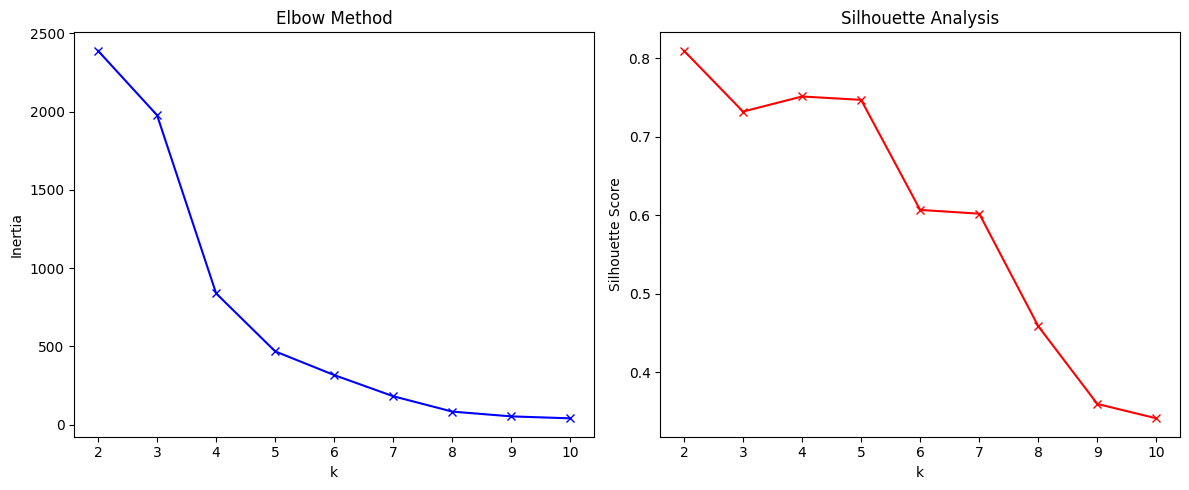

Silhouette Score terbaik: 0.8098681704159247 untuk k = 2


In [2]:
featuress = [
    'Residential_2021', 'Industrial_2021', 'Business_2021', 'Social_2021', 'Gov_Office_2021', 
    'Pub_Street_2021', 'Total_2021', 'Residential_2022', 'Industrial_2022', 'Business_2022', 
    'Social_2022', 'Gov_Office_2022', 'Pub_Street_2022', 'Total_2022', 'Residential', 
    'Industrial', 'Business', 'Social', 'Gov_Office', 'Pub_Street', 'Total', 
    'JP_2021', 'JP_2022', 'JP_2023', 'KP_2021', 'KP_2022', 'KP_2023'
]

dataS = data_final[featuress]
dataS['Provinsi'] = data_final['Province']

scaler = RobustScaler()
dataS_scaled = scaler.fit_transform(dataS[featuress])


def find_cluster(X, maxk=10):  
    inertias = []
    silhouette_scores = []  
    K = range(2, maxk + 1)  

    for k in K:
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(X)
        inertias.append(model.inertia_)
        silhouette_scores.append(silhouette_score(X, model.labels_))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')

    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'rx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')

    plt.tight_layout()
    plt.show()

    best_sil_score = max(silhouette_scores) 
    best_k = K[silhouette_scores.index(best_sil_score)]
    print(f"Silhouette Score terbaik: {best_sil_score} untuk k = {best_k}")

find_cluster(dataS_scaled, maxk=10) 



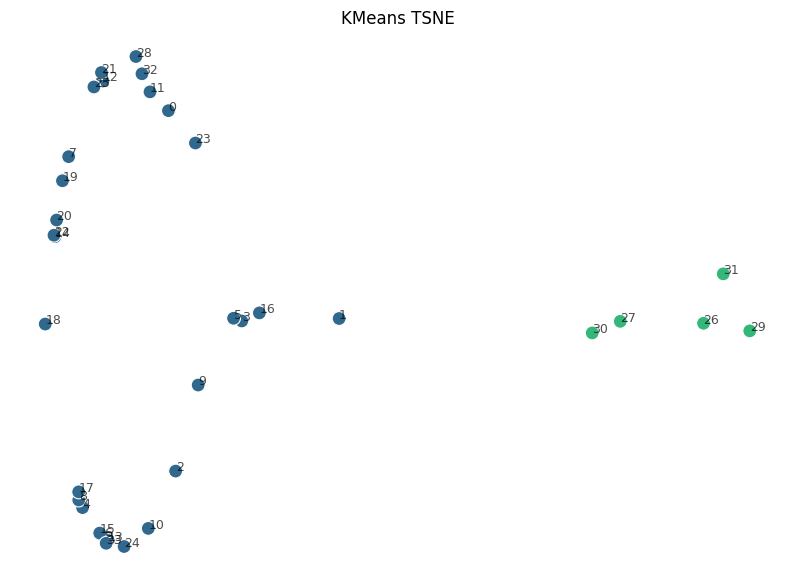


Index Provinsi dan Nama Provinsi:
Index 0: Aceh
Index 1: Sumatera Utara
Index 2: Sumatera Barat
Index 3: Riau
Index 4: Kep. Riau
Index 5: Sumatera Selatan
Index 6: Jambi
Index 7: Bengkulu
Index 8: Kep. Bangka Belitung
Index 9: Lampung
Index 10: Kalimantan Barat
Index 11: Kalimantan Selatan
Index 12: Kalimantan Tengah
Index 13: Sulawesi Utara
Index 14: Gorontalo
Index 15: Sulawesi Tengah
Index 16: Sulawesi Selatan
Index 17: Sulawesi Tenggara
Index 18: Sulawesi Barat
Index 19: Maluku
Index 20: Maluku Utara
Index 21: Papua
Index 22: Papua Barat
Index 23: Bali
Index 24: Nusa Tenggara Barat
Index 25: Nusa Tenggara Timur
Index 26: Jawa Timur
Index 27: Jawa Tengah
Index 28: DI Yogyakarta
Index 29: Jawa Barat
Index 30: Banten
Index 31: DKI Jakarta
Index 32: Kalimantan Timur
Index 33: Kalimantan Utara


In [8]:
kmeans = KMeans(n_clusters=2, random_state=42)  
kmeans.fit(dataS_scaled) 
dataS['Cluster'] = kmeans.labels_

def plot_tsne_with_clusters(X, kmeans_labels, provinsi_names):
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    df_tsne = pd.DataFrame(data=X_tsne, columns=['tSNE1', 'tSNE2'])
    df_tsne['Cluster'] = kmeans_labels
    df_tsne['Provinsi'] = provinsi_names 

    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_tsne, x='tSNE1', y='tSNE2', hue='Cluster', palette='viridis', s=100, legend=None)
    for i in range(len(provinsi_names)):
        plt.text(df_tsne.loc[i, 'tSNE1'], df_tsne.loc[i, 'tSNE2'], str(i), fontsize=9, alpha=0.7)
    plt.title('KMeans TSNE')
    plt.axis("off")
    plt.show()

    print("\nIndex Provinsi dan Nama Provinsi:")
    for i, province in enumerate(provinsi_names):
        print(f"Index {i}: {province}")

plot_tsne_with_clusters(dataS_scaled, kmeans.labels_, dataS['Provinsi'].tolist())



In [5]:
for cluster_id in np.unique(kmeans.labels_):
    print(f"Provinsi dalam Klaster {cluster_id}:")
    print(dataS[dataS['Cluster'] == cluster_id]['Provinsi'].tolist())


silhouett = silhouette_score(dataS_scaled, kmeans.labels_)

print(f"Silhouette Score: {silhouett}")

Provinsi dalam Klaster 0:
['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Barat', 'Maluku', 'Maluku Utara', 'Papua', 'Papua Barat', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']
Provinsi dalam Klaster 1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']
Silhouette Score: 0.8098681704159247


In [ ]:
import umap
def plot_umap_with_clusters(X, cluster_labels, provinsi_names, title='KMeans UMAP'):
    reducer = umap.UMAP(n_components=2, random_state=42)
    X_umap = reducer.fit_transform(X)

    df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
    df_umap['Cluster'] = cluster_labels
    df_umap['Provinsi'] = provinsi_names

    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis', s=100, legend=None)

    for i in range(len(provinsi_names)):
        plt.text(df_umap.loc[i, 'UMAP1'], df_umap.loc[i, 'UMAP2'], str(i), fontsize=9, alpha=0.7)

    plt.title(title)
    plt.axis('off')
    plt.show()


c:\Users\Jeff\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Jeff\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


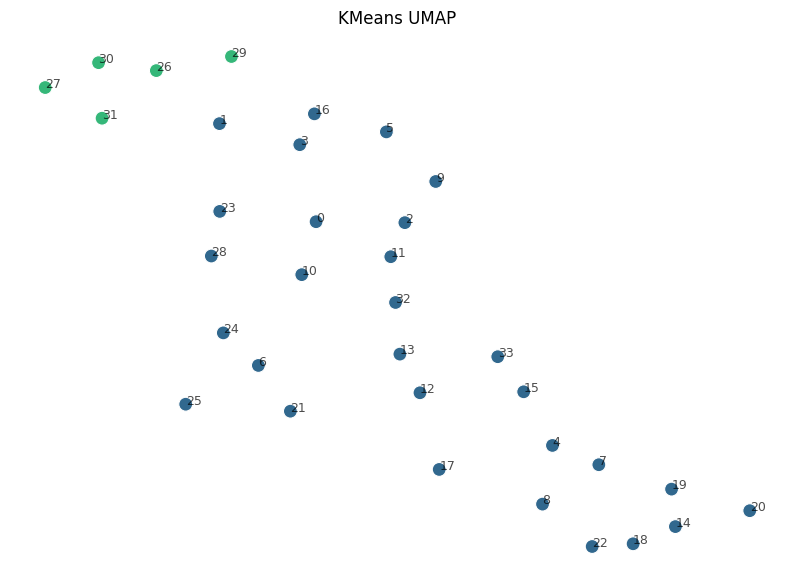


Index Provinsi dan Nama Provinsi:
Index 0: Aceh
Index 1: Sumatera Utara
Index 2: Sumatera Barat
Index 3: Riau
Index 4: Kep. Riau
Index 5: Sumatera Selatan
Index 6: Jambi
Index 7: Bengkulu
Index 8: Kep. Bangka Belitung
Index 9: Lampung
Index 10: Kalimantan Barat
Index 11: Kalimantan Selatan
Index 12: Kalimantan Tengah
Index 13: Sulawesi Utara
Index 14: Gorontalo
Index 15: Sulawesi Tengah
Index 16: Sulawesi Selatan
Index 17: Sulawesi Tenggara
Index 18: Sulawesi Barat
Index 19: Maluku
Index 20: Maluku Utara
Index 21: Papua
Index 22: Papua Barat
Index 23: Bali
Index 24: Nusa Tenggara Barat
Index 25: Nusa Tenggara Timur
Index 26: Jawa Timur
Index 27: Jawa Tengah
Index 28: DI Yogyakarta
Index 29: Jawa Barat
Index 30: Banten
Index 31: DKI Jakarta
Index 32: Kalimantan Timur
Index 33: Kalimantan Utara


In [10]:
plot_umap_with_clusters(dataS_scaled, kmeans.labels_, dataS['Provinsi'].tolist())